In [1]:
from numpy.random import randint
import numpy as np
from qiskit import *
from qiskit import IBMQ
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [2]:
q1=QuantumRegister(4)
c1=ClassicalRegister(4)
qc1=QuantumCircuit(q1,c1)

In [3]:
qc1.h(q1[1])
qc1.cx(q1[1],q1[0])
qc1.h(q1[3])
qc1.cx(q1[3],q1[2])
qc1.draw()

┌───┐
q0_0: ─────┤ X ├
      ┌───┐└─┬─┘
q0_1: ┤ H ├──■──
      └───┘┌───┐
q0_2: ─────┤ X ├
      ┌───┐└─┬─┘
q0_3: ┤ H ├──■──
      └───┘     
c0: 4/══════════

In [4]:
np.random.seed()
n=4
alice_bits=list(randint(2,size=n))

#print(alice_bits)
if alice_bits[:2]==[0,0]:
    pass
elif alice_bits[:2]==[0,1]:
    qc1.x(q1[0])
elif alice_bits[:2]==[1,0]:
    qc1.z(q1[0])
else:
    qc1.z(q1[0])
    qc1.x(q1[0])
if alice_bits[2:]==[0,0]:
    pass
elif alice_bits[2:]==[0,1]:
    qc1.x(q1[2])
elif alice_bits[2:]==[1,0]:
    qc1.z(q1[2])
else:
    qc1.z(q1[2])
    qc1.x(q1[2])
qc1.draw()

┌───┐┌───┐
q0_0: ─────┤ X ├┤ X ├
      ┌───┐└─┬─┘└───┘
q0_1: ┤ H ├──■───────
      └───┘┌───┐┌───┐
q0_2: ─────┤ X ├┤ Z ├
      ┌───┐└─┬─┘└───┘
q0_3: ┤ H ├──■───────
      └───┘          
c0: 4/═══════════════

In [5]:
print(alice_bits)

[0, 1, 1, 0]


In [6]:
qc1.cx(q1[0],q1[1])
qc1.h(q1[0])
qc1.cx(q1[2],q1[3])
qc1.h(q1[2])
qc1.measure(q1,c1)
qc1.draw()

┌───┐┌───┐     ┌───┐   ┌─┐   
q0_0: ─────┤ X ├┤ X ├──■──┤ H ├───┤M├───
      ┌───┐└─┬─┘└───┘┌─┴─┐└───┘┌─┐└╥┘   
q0_1: ┤ H ├──■───────┤ X ├─────┤M├─╫────
      └───┘┌───┐┌───┐└───┘┌───┐└╥┘ ║ ┌─┐
q0_2: ─────┤ X ├┤ Z ├──■──┤ H ├─╫──╫─┤M├
      ┌───┐└─┬─┘└───┘┌─┴─┐└┬─┬┘ ║  ║ └╥┘
q0_3: ┤ H ├──■───────┤ X ├─┤M├──╫──╫──╫─
      └───┘          └───┘ └╥┘  ║  ║  ║ 
c0: 4/══════════════════════╩═══╩══╩══╩═
                            3   1  0  2

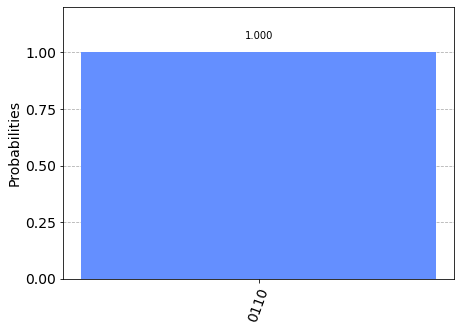

In [7]:
sim1=Aer.get_backend("qasm_simulator")
job1=execute(qc1,sim1,shots=1024)
res1=job1.result()
counts1=res1.get_counts()
plot_histogram(counts1)

In [8]:
token="dd361dfa45da932b3db1d5cfa442a0ea978768d7b94b99a9a698298af70582e25ecc0b0967e89b4937ba0ebad239a74bde4ca5e15bbbc2855a11f508f5437756"
IBMQ.save_account(token)

configrc.store_credentials:WARNING:2021-10-20 19:54:52,923: Credentials already present. Set overwrite=True to overwrite.


In [9]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub="ibm-q")
backend=least_busy(provider.backends(filters=lambda x:x.configuration().n_qubits>=2 and not x.configuration().simulator and x.status().operational==True))
job1_r=execute(qc1,backend=backend,shots=1024)
job_monitor(job1_r)

Job Status: job has successfully run


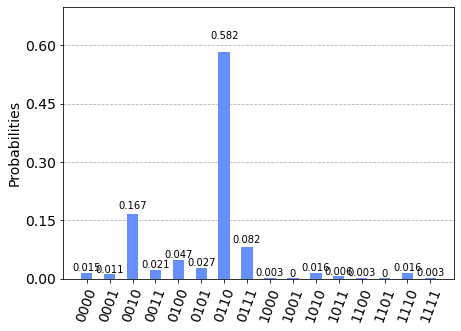

In [10]:
res1_r=job1_r.result()
counts1_r=res1_r.get_counts()
plot_histogram(counts1_r)

In [11]:
def bit(dic):
    s=max(dic.values())
    for i in dic.keys():
        if dic[i]==s:
            res=i
    return res
def ber(dic,n):
    b=bit(dic)
    res=0
    for i in dic.keys():
        count=0
        for j in range(len(i)):
            if i[j]!=b[j]:
                count+=1
        res+=(float(dic[i])/n)*(float(count)/4)
    return res

In [12]:
print(bit(counts1_r))
ber(counts1_r,1024)

0110


0.13671875